## Word Vectors (word2vec)

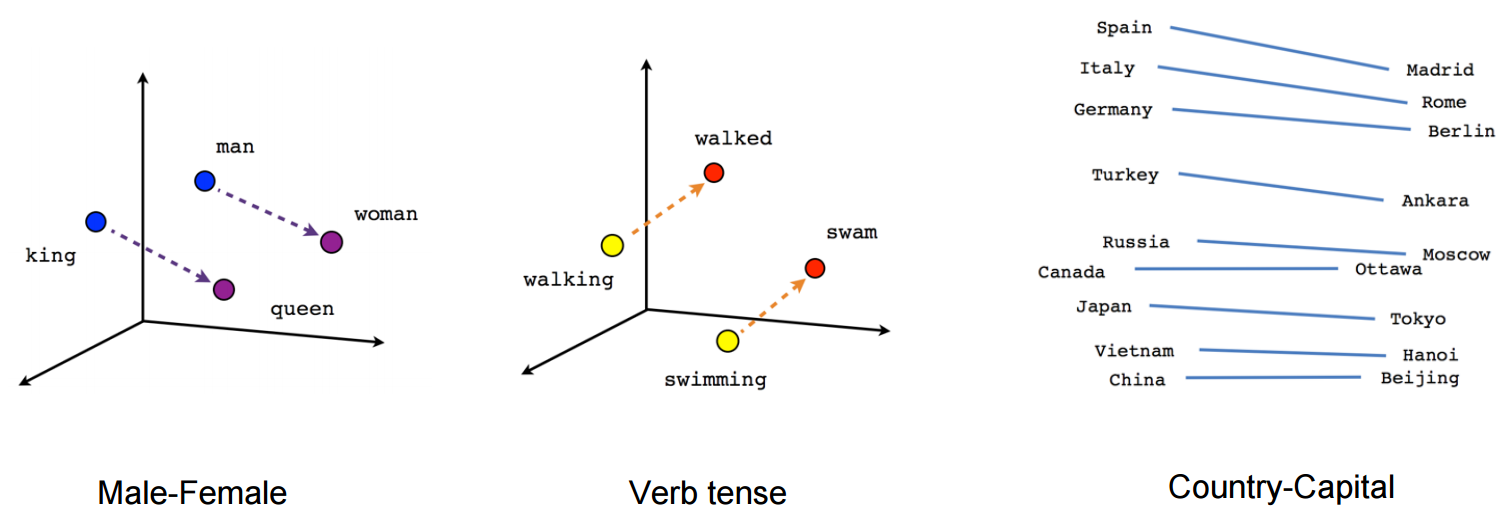

In [82]:
# we'll attach an image to let you understad what word2vec is in simple terms
from IPython.display import Image
Image("word2vec.png")

The idea behind Word2Vec is pretty simple. We’re making an assumption that the meaning of a word can be inferred by the company it keeps. If you have two words that have very similar neighbors (meaning: the context in which its used is about the same), then these words are probably quite similar in meaning or are at least related. For example, the words king, queen and prince are usually used in a similar context.

So we can say that “The meaning of a word can be inferred by the company it keeps”. Word2Vec takes 'raw' text as input and learns a word by predicting its surrounding context or predict a word given its surrounding context.

Using this underlying assumption, we can use Word2Vec to surface similar concepts, find unrelated concepts, compute similarity between two words and more! For example, if we want to filter our mailbox to get just the job-related emails, we can train a word2vec model with job-related emails and then when we get a new email, we can predict that if it's a job-related email or not by looking at the similarities between words. Or if we want to build a recommendation system, we can treat the shopping items bought together as a word in sentence and then frecommend a new item to consumers by looking at what he/she bought actually.

Word embeddings use numbers to represent words. Each of those numbers is in a dimension, and each locates a word in, say, 300-dimensional space. Once word embeddings have been trained, you can use them to derive similarities between words, as well as other relations. The typical example for word embeddings is that they allow you to perform math like this: King - Queen = Man - Woman, because the difference between the word embeddings is similar, and therefore King - Queen + Woman = Man. So by manipulating the equation, you can actually derive relationships that you didn't know existed.

Basically, all words in the corpus we deal with can be represented by the word vector in a desired number of dimensions and then we can use this vector representation to find relationships between the words. Using large amounts of unannotated plain text, word2vec learns relationships between words automatically. The output are vectors, one vector per word, with remarkable linear relationships that allow us to make some inferences.

For example:

-0.77069 0.12827 0.33137 0.0050893 -0.47605 -0.50116 1.858 1.0624 -0.56511 0.13328 -0.41918 -0.14195 -2.8555 -0.57131 -0.13418 -0.44922 0.48591 -0.6479 -0.84238 0.61669 -0.19824 -0.57967 -0.65885 0.43928 -0.50473

(a 25-dimensional word vector of word 'hello')


which is basically an array of numbers which represent semantic/syntactic information of words in a way that computers can understand.

In [2]:
# lets see how to build our word2vec model using genism library
import gensim

Next, is finding a really good dataset. The secret to getting Word2Vec really working for you is to have lots and lots of text data in the relevant domain.

we'll use open source BBC news dataset corresponding to stories in five topical areas from 2004-2005.
Class Labels: 5 (business, entertainment, politics, sport, tech) 

You can download this dataset from:

http://mlg.ucd.ie/files/datasets/bbcsport-fulltext.zip

Let's start with sports related news

In [7]:
# first, we'll get the list of txt files under bbc_sport folder so that we can pass this on to the Word2Vec model.
# we can use glob library for that
import glob
file_names=glob.glob("bbc_sport/*.txt")
file_names

['bbc_sport/289.txt',
 'bbc_sport/504.txt',
 'bbc_sport/262.txt',
 'bbc_sport/276.txt',
 'bbc_sport/510.txt',
 'bbc_sport/060.txt',
 'bbc_sport/074.txt',
 'bbc_sport/048.txt',
 'bbc_sport/114.txt',
 'bbc_sport/100.txt',
 'bbc_sport/128.txt',
 'bbc_sport/470.txt',
 'bbc_sport/316.txt',
 'bbc_sport/302.txt',
 'bbc_sport/464.txt',
 'bbc_sport/458.txt',
 'bbc_sport/459.txt',
 'bbc_sport/303.txt',
 'bbc_sport/465.txt',
 'bbc_sport/471.txt',
 'bbc_sport/317.txt',
 'bbc_sport/129.txt',
 'bbc_sport/101.txt',
 'bbc_sport/115.txt',
 'bbc_sport/049.txt',
 'bbc_sport/075.txt',
 'bbc_sport/061.txt',
 'bbc_sport/277.txt',
 'bbc_sport/511.txt',
 'bbc_sport/505.txt',
 'bbc_sport/263.txt',
 'bbc_sport/288.txt',
 'bbc_sport/275.txt',
 'bbc_sport/261.txt',
 'bbc_sport/507.txt',
 'bbc_sport/249.txt',
 'bbc_sport/088.txt',
 'bbc_sport/077.txt',
 'bbc_sport/063.txt',
 'bbc_sport/103.txt',
 'bbc_sport/117.txt',
 'bbc_sport/498.txt',
 'bbc_sport/467.txt',
 'bbc_sport/301.txt',
 'bbc_sport/315.txt',
 'bbc_spor

In [14]:
# lets read one sinlgle file at first to see how it looks

with open ('bbc_sport/394.txt', "r", encoding="utf-8") as f:
    print (f.read())

Tindall wants second opinion

England centre Mike Tindall is to seek a second opinion before having surgery on a foot injury that could force him to miss the entire Six Nations.

The Bath player was already out of the opener against Wales on 5 February because of a hand problem. "Mike had a specialist review on a fracture in his right mid foot," said England doctor Simon Kemp. "Before a final decision is made on surgery... medical teams have decided he should see a second specialist."

England coach Andy Robinson is already without centre Will Greenwood and flanker Richard Hill while fly-half Jonny Wilkinson is certain to miss at least the first two games. Robinson is expected to announce his new-look England line-up on Monday for the match at the Millennium Stadium. And Newcastle's 18-year-old centre Mathew Tait is set to stand in for Tindall alongside club team-mate Jamie Noon.

Meanwhile, Tindall is targeting a return to action before the end of the regular Zurich Premiership season

In [16]:
# now we'll read all the txt files into one single list: list of texts
sport_text_list=[]
for file in file_names:
    try: # we'll use try-catch block to prevent the code from crashing if it cannot read any of the txt files
        with open (file, "r", encoding="utf-8") as f:
            sport_text_list.append(f.read())
    except:
        pass

Lets apply some text preprocessing to clean the text. Apart form what we did before, we'll use a preprocessing tool from gensim library. This does some basic pre-processing such as tokenization, lowercasing, etc. and returns back a list of tokens (words) (except stopword removal). Documentation of this pre-processing method can be found on the official Gensim documentation site.

https://radimrehurek.com/gensim/utils.html

In [19]:
import gensim

clean_texts=[]
for text in sport_text_list:
    clean_texts.append(gensim.utils.simple_preprocess(text))

In [35]:
# here is the first proprocessed text from our corpus
clean_texts[3]

['mexicans',
 'tracking',
 'unhappy',
 'juninho',
 'mexican',
 'outfit',
 'red',
 'sharks',
 'veracruz',
 'hope',
 'to',
 'sign',
 'juninho',
 'if',
 'the',
 'brazilian',
 'decides',
 'to',
 'leave',
 'celtic',
 'frustrated',
 'at',
 'his',
 'lack',
 'of',
 'first',
 'team',
 'action',
 'their',
 'president',
 'gustavo',
 'parente',
 'sanchez',
 'says',
 'juninho',
 'does',
 'not',
 'wish',
 'to',
 'remain',
 'in',
 'scottish',
 'football',
 'anymore',
 'agent',
 'brian',
 'hassell',
 'insists',
 'that',
 'the',
 'year',
 'old',
 'brazilian',
 'midfielder',
 'is',
 'determined',
 'to',
 'win',
 'back',
 'his',
 'place',
 'but',
 'if',
 'the',
 'manager',
 'is',
 'not',
 'going',
 'to',
 'pick',
 'him',
 'that',
 'different',
 'ball',
 'game',
 'he',
 'told',
 'the',
 'sun',
 'that',
 'something',
 'we',
 'have',
 'to',
 'look',
 'at',
 'juninho',
 'deserves',
 'respect',
 'he',
 'is',
 'not',
 'little',
 'kid',
 'hassell',
 'warns',
 'that',
 'juninho',
 'could',
 'reconsider',
 'his',

### Training the word2vec model

Training the model is fairly straightforward. You just instantiate Word2Vec and pass the reviews that we read in the previous step. So, we are essentially passing on a list of lists. Where each list within the main list contains a set of tokens from a user review. Word2Vec uses all these tokens to internally create a vocabulary. And by vocabulary, I mean a set of unique words.


In [50]:
# build vocabulary and train model
# you can see what all the inner parameters mean from the official gensim documentation

model = gensim.models.Word2Vec(
        clean_texts,
        size=150, # The size of the dense vector to represent each token or word 
        window=10, # The maximum distance between the target word and its neighboring word. 
        min_count=5, # Minimium frequency count of words. The model would ignore words that do not satisfy the min_count 
        workers=10) # How many threads to use behind the scenes

model.train(clean_texts, total_examples=len(clean_texts), epochs=10) 

(1143605, 1600870)

In [77]:
# let's see how our vector looks like
# the numbers below respresents the whole vocabulary in vector

import numpy as np
words = list(model.wv.vocab)
vectors = []
for word in words:
    vectors.append(model[word].tolist())
data = np.array(vectors)
data

/Users/vkocaman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


array([[-5.34757793e-01, -9.71231401e-01,  2.95756292e+00, ...,
        -3.79003763e-01, -4.28413838e-01,  1.97899029e-01],
       [-2.37958096e-02, -7.80655146e-02,  3.43717843e-01, ...,
        -1.04759652e-02,  1.17462039e-01,  7.16936886e-02],
       [-3.06507647e-01, -4.03412208e-02,  8.70026290e-01, ...,
        -8.54412094e-02,  2.67458081e-01, -1.31184727e-01],
       ...,
       [-3.73310894e-02, -1.04694813e-01,  2.41008192e-01, ...,
        -9.18861013e-03,  3.38347554e-02,  5.65133207e-02],
       [-4.43553440e-02, -4.17100079e-02,  2.94806689e-01, ...,
        -1.08530628e-03,  9.36367363e-02,  1.71935353e-02],
       [-6.79473728e-02,  1.89131610e-02,  1.27057150e-01, ...,
         2.21080128e-02,  1.09593458e-01,  1.79649040e-03]])

In [81]:
# we can see the vector representation of a single word
# The number of dimesions will be the same as the size of the dense vector we used when we build the model (size=150)

word="celtic"

model[word].tolist()

/Users/vkocaman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


[0.06196526065468788,
 -0.2052670568227768,
 0.3873513340950012,
 0.33975088596343994,
 0.050544802099466324,
 -0.044648367911577225,
 -0.4610576033592224,
 0.4109431505203247,
 -0.02443268895149231,
 -0.12429479509592056,
 -0.4488071799278259,
 -0.09385889023542404,
 -0.0596623420715332,
 0.23687981069087982,
 -0.045401204377412796,
 -0.331748902797699,
 0.23254120349884033,
 -0.1308397650718689,
 -0.16235089302062988,
 -0.4000946283340454,
 -0.1017998680472374,
 0.03905006870627403,
 0.3488001823425293,
 0.023176435381174088,
 -0.38700348138809204,
 -0.21174602210521698,
 0.3488289713859558,
 -0.33821889758110046,
 0.3902468979358673,
 0.17521241307258606,
 0.05678168311715126,
 -0.03874402865767479,
 0.10520768910646439,
 0.35170936584472656,
 0.547566294670105,
 -0.3264879584312439,
 0.06091310456395149,
 0.21317945420742035,
 0.020095665007829666,
 -0.2938414514064789,
 -0.033604755997657776,
 -0.31500673294067383,
 0.22755934298038483,
 -0.015276889316737652,
 0.5409767031669617,

After building the vocabulary, we just need to call train(...) to start training the Word2Vec model. Behind the scenes, what’s happening here is that we are training a neural network with a single hidden layer where we train the model to predict the current word based on the context (using the default neural architecture). However, we are not going to use the neural network after training! Instead, the goal is to learn the weights of the hidden layer. These weights are essentially the word vectors that we’re trying to learn. The resulting learned vector is also known as the embeddings. You can think of these embeddings as some features that describe the target word. For example, the word king may be described by the gender, age, the type of people the king associates with, etc.

Let's see similarity on some sport types. This first example shows a simple look up of words similar to the word ‘match’. All we need to do here is to call the most_similar function and provide the word ‘match’ as the positive example. This returns the top 10 similar words.

In [51]:
word="match"

model.wv.most_similar(positive=word)

[('miss', 0.836645781993866),
 ('tore', 0.8115267753601074),
 ('losing', 0.8113941550254822),
 ('defeat', 0.8008531332015991),
 ('home', 0.794732391834259),
 ('victory', 0.7947053909301758),
 ('leg', 0.7872378826141357),
 ('french', 0.7856617569923401),
 ('group', 0.780176043510437),
 ('first', 0.778445303440094)]

In [52]:
# lets try the same with an adjective : "good"

word="good"

model.wv.most_similar(positive=word)

[('some', 0.9530014395713806),
 ('very', 0.9357596635818481),
 ('really', 0.9320244193077087),
 ('difficult', 0.9116581082344055),
 ('much', 0.9018115997314453),
 ('well', 0.9014899730682373),
 ('getting', 0.8994660377502441),
 ('better', 0.8973612785339355),
 ('felt', 0.894258975982666),
 ('more', 0.8942355513572693)]

In [53]:
# lets try the same with a sport club : "celtic"

word="celtic"

model.wv.most_similar(positive=word)

[('gunners', 0.9495993256568909),
 ('fulham', 0.9369602799415588),
 ('leaders', 0.9346776604652405),
 ('portsmouth', 0.9047377109527588),
 ('nottingham', 0.9009836316108704),
 ('derby', 0.8917559385299683),
 ('sociedad', 0.8910036683082581),
 ('bolton', 0.888599157333374),
 ('brentford', 0.8811548948287964),
 ('hartlepool', 0.8810843825340271)]

Overall, the results actually make sense. All of the related words tend to be used in similar contexts.

Now you could even use Word2Vec to compute similarity between two words in the vocabulary by invoking the similarity(...) function and passing in the relevant words.



In [55]:
model.wv.similarity(w1="celtic", w2="nottingham")

0.9009835997957216

In [59]:
model.wv.similarity(w1="good", w2="bad")

0.6762403931963898

In [60]:
model.wv.similarity(w1="good", w2="great")

0.7642428517726292

In [61]:
model.wv.similarity(w1="well", w2="bad")

0.5229676342222156

Under the hood, the above four snippets compute the cosine similarity between the two specified words using word vectors (embeddings) of each. From the scores above, it makes sense that celtic is highly similar to nottingham but good is dissimilar to bad. If you do a similarity between two identical words, the score will be 1.0 as the range of the cosine similarity score will always be between [0.0-1.0]. 



In [62]:
model.wv.similarity(w1="good", w2="good")

1.0000000000000002

In [69]:
model.wv.similarity(w1="kids", w2="boys")

0.8079028768496817

In [71]:
model.wv.similarity(w1="kids", w2="men")

0.06319620530230166

doc2vec model gets its algorithm from word2vec.

In word2vec there is no need to label the words, because every word has their own semantic meaning in the vocabulary. But in case of doc2vec, there is a need to specify that how many number of words or sentences convey a semantic meaning, so that the algorithm could identify it as a single entity. For this reason, we are specifying labels or tags to sentence or paragraph depending on the level of semantic meaning conveyed.

If we specify a single label to multiple sentences in a paragraph, it means that all the sentences in the paragraph are required to convey the meaning. On the other hand, if we specify variable labels to all the sentences in a paragraph, it means that each conveys a semantic meaning and they may or may not have similarity among them.

In simple terms, a label means semantic meaning of something.

In [91]:
import gensim
import os
import re
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim.models.doc2vec import TaggedDocument
 
def get_doc_list(folder_name):
    doc_list = []
    file_list = [folder_name+'/'+name for name in os.listdir(folder_name) if name.endswith('txt')]
    for file in file_list:
        try:
            st = open(file, "r", encoding="utf-8").read()
            doc_list.append(st)
        except:
            pass
    print ('Found %s documents under the dir %s .....'%(len(file_list),folder_name))
    return doc_list
 
def get_doc(folder_name):
 
    doc_list = get_doc_list(folder_name)
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = get_stop_words('en')
    p_stemmer = PorterStemmer()
 
    taggeddoc = []
 
    texts = []
    for index,i in enumerate(doc_list):
        # for tagged doc
        wordslist = []
        tagslist = []
 
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
 
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
 
        # remove numbers
        number_tokens = [re.sub(r'[\d]', ' ', i) for i in stopped_tokens]
        number_tokens = ' '.join(number_tokens).split()
 
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in number_tokens]
        # remove empty
        length_tokens = [i for i in stemmed_tokens if len(i) > 1]
        # add tokens to list
        texts.append(length_tokens)
 
        td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(stemmed_tokens))).split(),str(index))
        # for later versions, you may want to use: td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(stemmed_tokens))).split(),[str(index)])
        taggeddoc.append(td)
 
    return taggeddoc

In [97]:
import gensim
 
documents = get_doc('bbc_sport')
print ('Data Loading finished')
 
print (len(documents),type(documents))
 
# build the model
model = gensim.models.Doc2Vec(documents, dm = 0, alpha=0.025, size= 20, min_alpha=0.025, min_count=0)
 
# start training
for epoch in range(200):
    if epoch % 20 == 0:
        print ('Now training epoch %s'%epoch)
    model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

# shows the similar words
print (model.most_similar('suppli'))
 
# shows the learnt embedding
print (model['suppli'])
 
# shows the similar docs with id = 2
print (model.docvecs.most_similar(str(2)))

Found 511 documents under the dir bbc_sport .....
Data Loading finished
510 <class 'list'>


/Users/vkocaman/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Now training epoch 0
Now training epoch 20
Now training epoch 40
Now training epoch 60
Now training epoch 80
Now training epoch 100
Now training epoch 120
Now training epoch 140
Now training epoch 160
Now training epoch 180
[('temper', 0.765617847442627), ('mikoliuna', 0.7174871563911438), ('henchoz', 0.669734001159668), ('disorgan', 0.6619540452957153), ('pentathlon', 0.6527152061462402), ('love', 0.652471661567688), ('wrongli', 0.6455695629119873), ('martyn', 0.645118236541748), ('disintegr', 0.6451168060302734), ('subsequ', 0.6424082517623901)]
[-2.30563921e-03  2.06995681e-02 -3.06315441e-03  2.33095922e-02
 -3.02606472e-03 -2.42537644e-04 -1.98214334e-02  7.60466931e-03
 -9.50856693e-03 -3.50423064e-03 -7.34907435e-03 -1.24938209e-02
 -9.89577311e-05 -2.47297026e-02 -1.74609162e-02 -9.63299535e-03
  7.49592343e-03  5.81880845e-03 -1.18701290e-02 -1.41518265e-02]
[('1', 0.9682232141494751), ('4', 0.9414011240005493), ('9', 0.9183844923973083), ('0', 0.9138666987419128), ('8', 0.905

/Users/vkocaman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


In [101]:
# shows the similar words
print (model.most_similar('ball'))
 
# shows the learnt embedding
print (model['ball'])
 
# shows the similar docs with id = 2
print (model.docvecs.most_similar(str(2)))

[('magnier', 0.6898579597473145), ('w', 0.665735125541687), ('exoner', 0.6653223633766174), ('goon', 0.6644275188446045), ('munster', 0.6597781777381897), ('war', 0.6561000943183899), ('joaquin', 0.6421452164649963), ('allevi', 0.6390132904052734), ('magic', 0.6235224604606628), ('aussi', 0.6221301555633545)]
[ 0.00824136 -0.01031618  0.0210071   0.01545134 -0.01344477  0.00902679
  0.01673476  0.02280895 -0.00539121  0.00108359 -0.01079332 -0.0230563
  0.00387202  0.00693777 -0.00769948  0.00720615  0.01218423  0.0128876
 -0.02259181 -0.00092356]
[('1', 0.9682232141494751), ('4', 0.9414011240005493), ('9', 0.9183844923973083), ('0', 0.9138666987419128), ('8', 0.9052757024765015), ('5', 0.8949227333068848), ('7', -0.8695367574691772), ('3', -0.8789302110671997), ('6', -0.8793240785598755)]


/Users/vkocaman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
